In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.append("./MyModules.py")
from MyModules import *

# Particle in a harmonic potential with $T\rightarrow 0$

## Classical description

In the classical description, the probability function is given by:
\begin{equation}
\pi(x) \approx \exp(-\beta x^2/2)
\end{equation}
where $T=1/\beta$. In the limit $T\rightarrow 0$, we obtain the following result

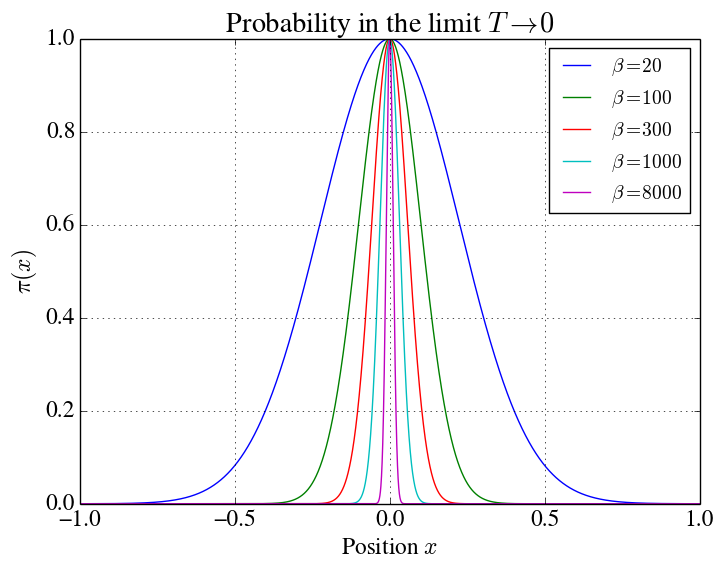

In [4]:
def Phi_C(x,beta):
    return np.exp(-0.5*beta*x**2)

X = np.linspace(-1,1,5000)
plt.figure(figsize=(8,6))
for b in [20,100,300,1000,8000]:
    plt.plot(X,Phi_C(X,b),'-',label="$ \\beta = %d$"%b)
plt.legend(loc="best",fontsize=14)
plt.xlabel("Position $x$")
plt.ylabel("$\pi(x)$")
plt.title("Probability in the limit $T \\rightarrow 0$")
plt.grid()
plt.savefig("PClassicTto0.pdf")
#plt.xlim([-1,1])

## Quantum description

In this case, we use the ground state function for a quantum particle in a harmonic potential. The function is given by:

\begin{equation}
\psi_0(x) = \cfrac{1}{\pi^{1/4}}\exp(-x^2/2)
\end{equation}

Now, we define the general form of wavefunction which satisfy the following recurrence relation

\begin{equation}
\psi_n(x) = \sqrt{\dfrac{2}{n}}x\psi_{n-1}(x) - \sqrt{\dfrac{n-1}{n}}\psi_{n-2}(x)
\end{equation}

Below we write the code in python to calculate the wavefunction of the particle. Note tha the function depend of position $x$ and the energy level $n$:

In [2]:
#=============================================================
# Ground State Function
#=============================================================
def Phi0(x):
    return np.exp(-0.5*x**2)/np.pi**(0.25)

#*************************************
# Probability density function for a
# particle in a harmonic potential
#*************************************
def PhiRec(n,x):
    if n==0:
        return Phi0(x)
    elif n<0:
        return 0.0        
    else:
        phi = np.sqrt(2.0/n)*x*Phi(n-1,x) - np.sqrt((n-1.0)/n)*Phi(n-2,x)
        return phi
    
def Phi(n,x):
    # Verifying if x is an scalar or an array of numpy
    if np.isscalar(x):
        phi = np.zeros(n+1,)
    else:
        phi = np.zeros((n+1,len(x)))
        
    #Ground State
    phi[0] = Phi0(x)
        
    if n>0:
        # First excited state
        phi[1] = np.sqrt(2.0)*x*phi[0]

        # For the other excited states
        for nl in xrange(2,n+1):
            phi[nl] = np.sqrt(2.0/nl)*x*phi[nl-1] - np.sqrt((nl-1.0)/nl)*phi[nl-2]
    return phi[-1]

In [4]:
def PlotHistogram(x,Fth,Fth2=None,n=0,Beta=0.0,Type="plot",Nbins=40,LAxis=[-1,1],figS=(8,6),**opt):
    
    if not bool(opt):
        opt={"Histo":{},"Figure":{"xlabel":{"s":""},"ylabel":{"s":""},"Title":"","savefig":{"option":False}},
             "Function":{},"xlabel":{}}
         
    if Type=="plot":

        plt.figure(figsize=figS)
        
        if opt["TypeHisto"]=="default":
            # Plot histogram
            N,Bins,patches = plt.hist(x,Nbins,**opt["Histo"])
        else:
            bins = np.linspace(LAxis[0],LAxis[1],Nbins)
            N,Bins,patches = plt.hist(x,bins,**opt["Histo"])
                    
        # Plot theoretical Function
        if opt["PlotFunc"]:
            xf = np.linspace(LAxis[0],LAxis[1],1000)
            if opt["curve"]=="Quantic":                
                plt.plot(xf,Fth(xf,Beta),**opt["Function"])
            elif opt["curve"]=="Classic":
                plt.plot(xf,Fth2(xf,beta),**opt["Function"])
            elif opt["curve"]=="QuantumClassic":
                plt.plot(xf,Fth(xf,Beta),**opt["Function"])
                plt.plot(xf,Fth2(xf,Beta),**opt["Function2"])
            elif opt["curve"]=="Position":
                plt.plot(xf,Fth(n,xf)**2,**opt["Function"])
            else:
                pass
        
        
        plt.xlabel(**opt["Figure"]["xlabel"])
        plt.ylabel(**opt["Figure"]["ylabel"])
        plt.title(opt["Figure"]["Title"])
        plt.legend(loc="best",fontsize=14)
        if opt["Figure"]["savefig"]["option"]==True:
            plt.savefig(opt["Figure"]["savefig"]["name"])      
    
    

In [23]:
Ntrial = 100000
dx = 2.0
x0 = 0.0
x = [x0]
Naccepted = 0.0

for i in xrange(1,Ntrial):
    
    xnew = x0 + np.random.uniform(-dx,dx)
    Gamma = Phi0(xnew)**2/Phi0(x0)**2
    if ( np.random.rand() < Gamma):
        x0 = xnew
        Naccepted+=1
    x.append(x0)

Options={"TypeHisto":"default","Nbins":50,"LAxis":[-4,4],
         "Histo":{"normed":True,"color":"g","alpha":0.5,"label":"Metropolis Algorithm","align":"mid"},
         "Function":{"color":"r","ls":"--","lw":2.5,"label":"Theoretical curve"},
         "Figure":{"xlabel":{"s":"Position $x$"},
                   "ylabel":{"s":"Probability $\pi(x)=|\psi_0(x)|^2$"},
                   "Title":"$|\psi_0(x)|^2$ with Metropolis Algorithm",
                   "savefig":{"option":False}},
         "figS":(8,6),
         "curve":"Position",
         "PlotFunc":True
         }
         
PlotHistogram(x,Phi,**Options)
plt.savefig("MCMC_QParticle_PosGroundState.pdf")
print "="*60
print "Ntrial: %d   Naccepted: %d   Percentage: %.2f%%"%(Ntrial,Naccepted,(100.0*Naccepted)/Ntrial)
print "="*60

Ntrial: 100000   Naccepted: 51247   Percentage: 51.25%


# Particle in a harmonic potential with finite temperature

In this case, the probability for this quantum particle to be found in a position $x$ is given by


\begin{equation}
\pi(n,x) \propto |\psi_n(x)|^2\exp(-\beta E_n)
\end{equation}

with $E_n = n + 1/2$. The state functions can be obtained using a recursive formula (mentioned above):

\begin{equation}
\psi_n(x) = \sqrt{\dfrac{2}{n}}x\psi_{n-1}(x) - \sqrt{\dfrac{n-1}{n}}\psi_{n-2}(x)
\end{equation}

In the first stage, we consider changes only in the position but keeping the energy level unaltered, that is, consider transition from $(n,x)$ to $(n,x')$

In [3]:
#*************************************
# Energy levels of the particle
#*************************************
def EN(n):
    return n+0.5

#*************************************
# Probability function pi(n,x)
#*************************************
def PiFunction(n,x,beta):
    #Calculation function
    PI = ( Phi(n,x)**2 )*np.exp( -beta*EN(n) )#*(0.5/np.sinh(0.5*beta))
    return PI


First, we plot the eigenfunction of the particle in the harmonic potential in order to verify the recurrence relation

In [5]:
X = np.arange(-7,7,0.01)
for n in xrange(10):
    plt.plot(X,EN(n) +Phi(n,X))
    plt.plot(X,[EN(n)]*len(X),'k--')
plt.plot(X,X**2/2,'r-',lw=2.0)
plt.ylim(ymax=10)
plt.xlim([-7,7])
plt.xlabel("Position $x$")
plt.ylabel("Wavefunctions")
plt.savefig("En_WaveFunc_Harmonic_Potential.pdf")

Now we will display the behavior of the propability function as temperature changes:

In [9]:
for b in xrange(6):
    plt.plot(X,PiFunction(0,X,b),'-',label="$\\beta=%d$"%b)
plt.legend(loc="best",fontsize=13)
plt.xlabel("$x$")
plt.ylabel("$\pi(n=0,x)$")
plt.title("For $n=0$",fontsize=15)

### MCMC Metropolis algorithm for quantum particle

In this algorithm we only consider changes in the position:

In [10]:
Ntrials = 10000
nlevel = 2
beta = 0.2
dx = 2.0
x = np.zeros(Ntrials)
Naccepted = 0.0

for i in xrange(1,Ntrials):
    xnew = x[i-1] + np.random.uniform(-dx,dx)
    Gamma = Phi(nlevel,xnew)**2/Phi(nlevel,x[i-1])**2 #if Phi(nlevel,x[i-1])**2>0 else 0.0
    Ptranst = 1 if Gamma>1 else Gamma
    if ( np.random.rand() < Ptranst):
        x[i] = xnew
        Naccepted+=1
    else:
        x[i] = x[i-1]
        
Options = {"TypeHisto":"default","Nbins":90,"LAxis":[-4,4],
           "Histo":{"normed":True,"color":"g","alpha":0.5,"label":"Metropolis Algorithm"},
           "Function":{"color":"r","ls":"--","lw":2.5,"label":"Theoretical curve"},
           "Figure":{"xlabel":{"s":"Position $x$"},
                     "ylabel":{"s":"Probability $|\psi_{%d}(x)|^2$ with MCMC"%nlevel,"fontsize":14},
                     "Title":"$|\psi_{%d}(x)|^2$ with Metropolis Algorithm"%nlevel,
                     "savefig":{"option":False}},
          "figS":(8,6),
          "curve":"Position",
          "PlotFunc":True}

PlotHistogram(x,Phi,n=nlevel,**Options)

print "="*60
print "Ntrial: %d   Naccepted: %d   Percentage: %.2f %%"%(Ntrials,Naccepted,(100.0*Naccepted)/Ntrials)
print "="*60

Ntrial: 10000   Naccepted: 5069   Percentage: 50.69 %


Now we consider changes in the energy and position $x$

In [10]:
def PiQuant(x,beta):
    return np.sqrt(np.tanh(0.5*beta)/np.pi)*np.exp(-x**2*np.tanh(0.5*beta))

def PiClass(x,beta):
    return np.sqrt(beta/(2*np.pi))*np.exp(-0.5*beta*x**2)

def PiMC(Beta,Ntrial,DX,EnF):
    x = 1E-6
    nlevel = 0
    xc = np.zeros(Ntrial)
    Naccepted = 0.0
    
    for i in xrange(Ntrial):
    
        #Determining transition for energy levels
        m = nlevel + (-1)**np.random.randint(0,2)
        if m>=0:
            DEn = EnF(m)-EnF(nlevel)
            Gamma = np.fabs(Phi(m,x)/Phi(nlevel,x))**2*np.exp(-Beta*DEn) #if np.fabs(Phi(nlevel,x))>0 else 1.0
            Pnm = min(1,Gamma)#1 if Gamma>1 else Gamma
            if ( np.random.rand() < Pnm):
                nlevel = m


        # Determining transition in the position of the particle using the actual
        # energy level obtained above
        xnew = x + np.random.uniform(-dx,dx)
        Gamma = Phi(nlevel,xnew)**2/Phi(nlevel,x)**2 #if Phi(nlevel,x)**2>0 else 1.0
        Ptranst = 1 if Gamma>1 else Gamma
        if ( np.random.rand() < Ptranst):
            x = xnew
            Naccepted+=1
        xc[i] = x
    print "="*60
    print "Ntrial: %d   Naccepted: %d   Percentage: %.2f %%"%(Ntrials,Naccepted,(100.0*Naccepted)/Ntrials)
    print "="*60
    return xc

In [30]:
Ntrials = 50000
beta = 1.
dx = 2.0
xc = PiMC(beta,Ntrials,dx,EN)
    

Options = {"TypeHisto":"default","Nbins":100,"LAxis":[-4,4],
           "Histo":{"normed":True,"color":"g","alpha":0.3,"label":"Metropolis Algorithm"},
           "Function":{"color":"r","ls":"--","lw":2.5,"label":"Theoretical curve  $\pi_{quant}(x)$ "},
           "Function2":{"color":"b","ls":"--","lw":2.5,"label":"Theoretical curve  $\pi_{class}(x)$ "},
           "Figure":{"xlabel":{"s":"Position $x$"},
                     "ylabel":{"s":"Probability $\pi(n,x)$  with MCMC","fontsize":14},
                     "Title":"$\pi(n,x)$ with Metropolis Algorithm and $\\beta=%.1f$"%beta,
                     "savefig":{"option":False}},
          "figS":(8,6),
          "curve":"QuantumClassic",
          "PlotFunc":True}
PlotHistogram(xc,Fth=PiQuant,Fth2=PiClass,Beta=beta,**Options)

Ntrial: 50000   Naccepted: 25404   Percentage: 50.81 %


Now, we graphicate $\pi(n,x)$ for values of $\beta=0.2,1,2$

Ntrial: 80000   Naccepted: 40749   Percentage: 50.94 %
Ntrial: 80000   Naccepted: 40772   Percentage: 50.97 %
Ntrial: 80000   Naccepted: 40966   Percentage: 51.21 %
Ntrial: 80000   Naccepted: 41117   Percentage: 51.40 %


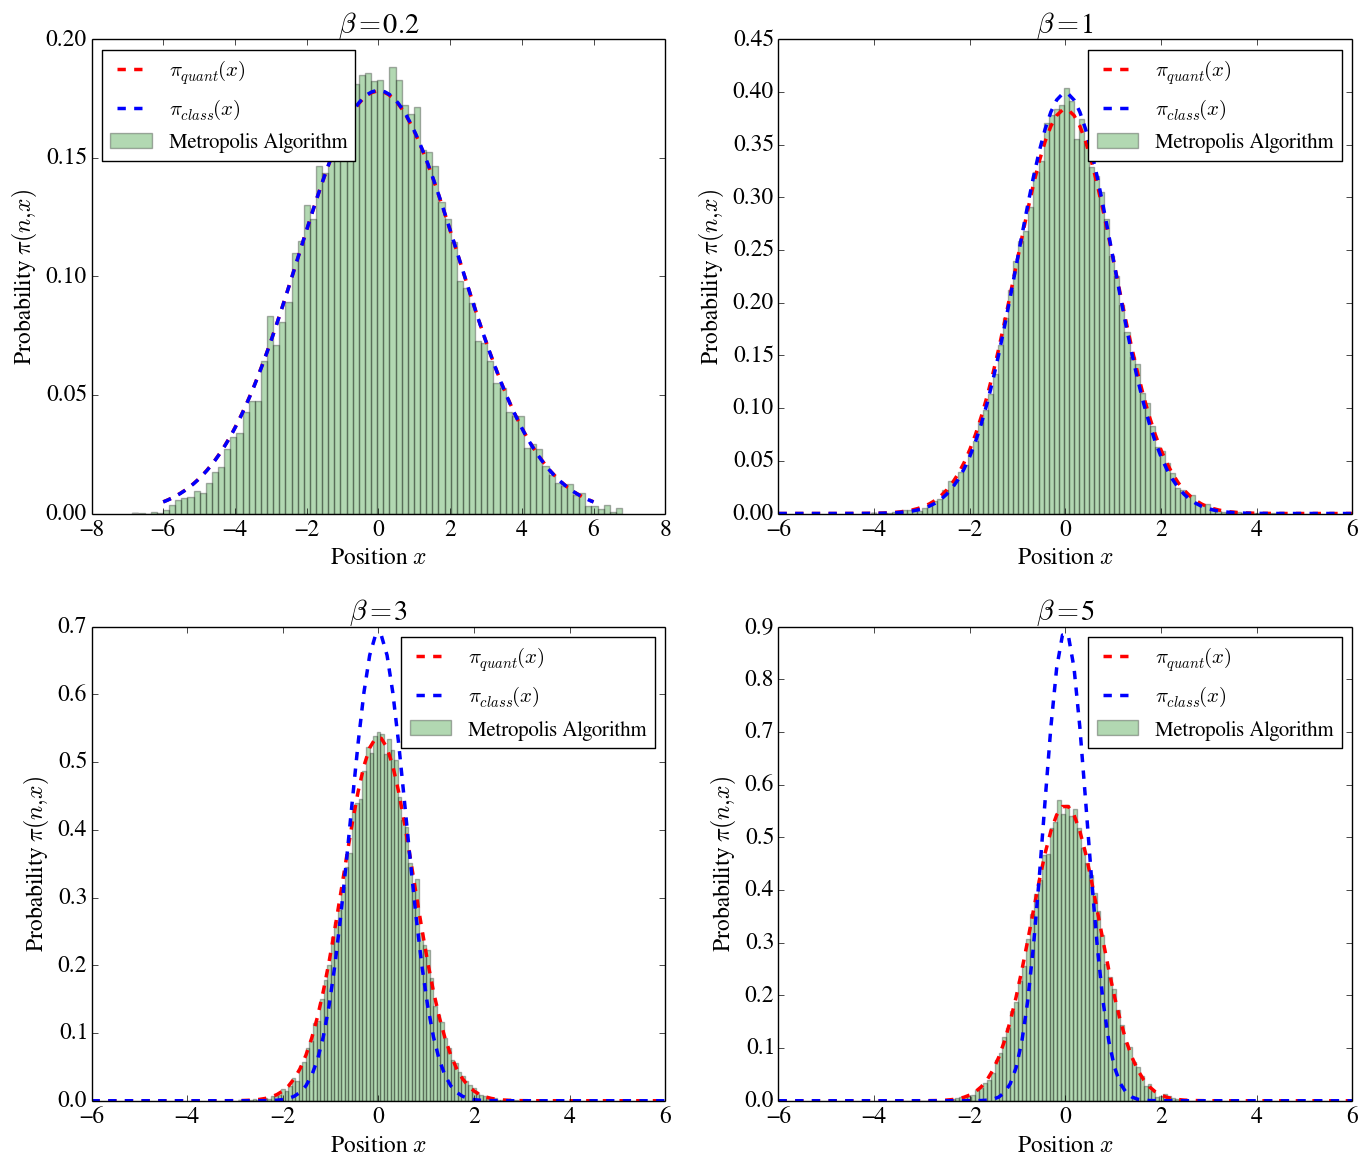

In [24]:
Ntrials = 80000
beta = [0.2,1,3,5]
dx=2.0
nbins=80

plt.figure(figsize(14,12))
fig,a = plt.subplots(2,2)
a = a.ravel()

xf = np.linspace(-6,6,100)
Labels = ["$\pi_{quant}(x)$","$\pi_{class}(x)$"]

for i,ax in enumerate(a):
    xc = PiMC(beta[i],Ntrials,dx,EN)
    ax.hist(xc,nbins,normed=True,alpha=0.3,color="green",label="Metropolis Algorithm")
    ax.plot(xf,PiQuant(xf,beta[i]),'r--',lw=2.5,label=Labels[0])
    ax.plot(xf,PiClass(xf,beta[i]),'b--',lw=2.5,label=Labels[1])
    ax.set_xlabel("Position $x$")
    ax.set_ylabel("Probability $\pi(n,x)$")
    ax.set_title("$\\beta=$"+str(beta[i]))
    ax.legend(loc="best",fontsize=15)
    

plt.tight_layout()
plt.savefig("MCMC_QParticle_FiniteTemp.pdf")